In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [31]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [33]:
corr = data_copy.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


Since the visualization has already been done with Rapid Miner, We are proceeding with the scaling

In [34]:
data_pre = data_copy.copy()
data_pre

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


Age, BMI and Charges need to be normalized to avoid erroneous results. We will use Standard Scaler for this

In [35]:
tempbmi = data_pre["bmi"]
tempbmi = tempbmi.values.reshape(-1,1)
data_pre["bmi"] = StandardScaler().fit_transform(tempbmi)
data_pre["bmi"]

0      -0.453320
1       0.509621
2       0.383307
3      -1.305531
4      -0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336   -0.797813
1337   -0.261388
Name: bmi, Length: 1338, dtype: float64

In [36]:
tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)
data_pre

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0,0.050297,3,0,0,-0.220551
1334,-1.509965,1,0.206139,0,0,1,-0.914002
1335,-1.509965,1,1.014878,0,0,2,-0.961596
1336,-1.296362,1,-0.797813,0,0,3,-0.930362


Now that the data has been normalized, the preprocessing part is over.Next step is to split the dataset into training and testing data

In [37]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("Dimensions after splitting the data:")
print('X_train : ', X_train.shape)
print('y_train : ', y_train.shape)
print('X_test : ', X_test.shape)
print('Y_test : ', y_test.shape)


Dimensions after splitting the data:
X_train :  (1070, 6)
y_train :  (1070, 1)
X_test :  (268, 6)
Y_test :  (268, 1)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV
#comparision = {}

Algorithm 1: Linear Regression

In [60]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

import numpy as np
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

In [41]:
print('Cross Validation Score: {0:.3f}'.format(cv_linear_reg.mean()))
print('R Squared score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R Squared score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

Cross Validation Score: 0.745
R Squared score (train) : 0.741
R Squared score (test) : 0.783
RMSE : 0.480


In [42]:
temp = [cv_linear_reg.mean(),r2_score_linear_reg_train,r2_score_linear_reg_test,rmse_linear]
#comparision["Linear Regression"] = temp


Algorithm 2: Ridge Regressor

In [43]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

In [44]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)


c:\Users\xjays\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.25803e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\xjays\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.81338e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\xjays\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.27216e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [61]:
parameters = { 
'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 
'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())
reg_ridge.best_estimator_, reg_ridge.best_score_

c:\Users\xjays\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.25803e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\xjays\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.81338e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\xjays\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.27216e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8259990140429396)

In [47]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))


In [48]:
print('Cross Validation Score: {0:.3f}'.format(cv_ridge.mean()))
print('R Squared score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R Squared score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

Cross Validation Score: 0.826
R Squared score (train) : 0.741
R Squared score (test) : 0.784
RMSE : 0.465


Algorithm 3: Random Forest Regressor

In [49]:
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

#reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
#reg_rf_gscv = reg_rf_gscv.fit(X_train_scaled, y_train_scaled.ravel())

This code has been commented out since its execution takes more than 10 minutes, 
it is found that the best estimator has the following parameters:
(bootstrap=True, criterion='mse', max_depth=50, max_features='auto', max_leaf_nodes=None, 
min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=12, min_samples_split=7,
 min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None, oob_score=False, 
 random_state=None, verbose=0, warm_start=False)
The best score found is:
0.8483687880955955

In [50]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, 
min_samples_split=7,n_estimators=1200)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [51]:
cv_rf = 0.8483687880955955

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(y_test_scaled, y_pred_rf_test)
rmse_rf = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test))


In [52]:
print('Cross Validation Score: {0:.3f}'.format(cv_rf))
print('R Squared score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R Squared score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

Cross Validation Score: 0.848
R Squared score (train) : 0.885
R Squared score (test) : 0.879
RMSE : 0.348


Now we start comparing the metrics of the three algorithms

In [53]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf)   
         ]

In [54]:
comparision = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
comparision

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.479808,0.74141,0.782694,0.744528
1,Ridge Regression,0.465206,0.74115,0.783800,0.825999
2,Random Forest Regression,0.348313,0.88453,0.878678,0.848369


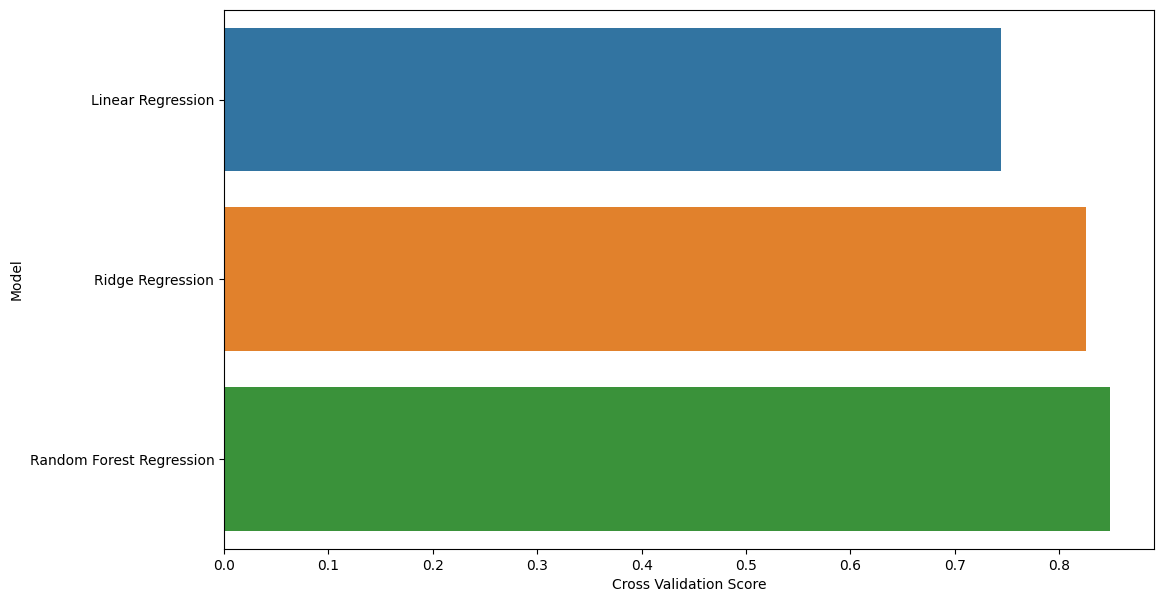

In [55]:
import seaborn as sns
plt.figure(figsize=(12,7))
#comparision.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)
sns.barplot(x='Cross-Validation', y='Model',data = comparision)
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

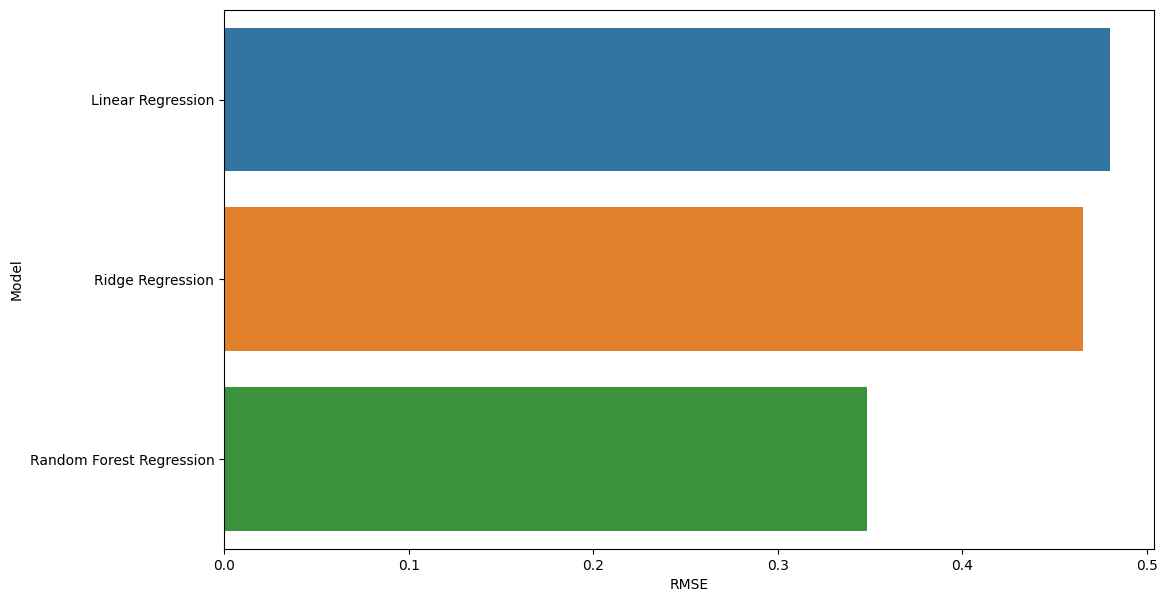

In [56]:
plt.figure(figsize=(12,7))
#comparision.sort_values(by=['RMSE'], ascending=False, inplace=True)
sns.barplot(x='RMSE', y='Model',data = comparision)
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

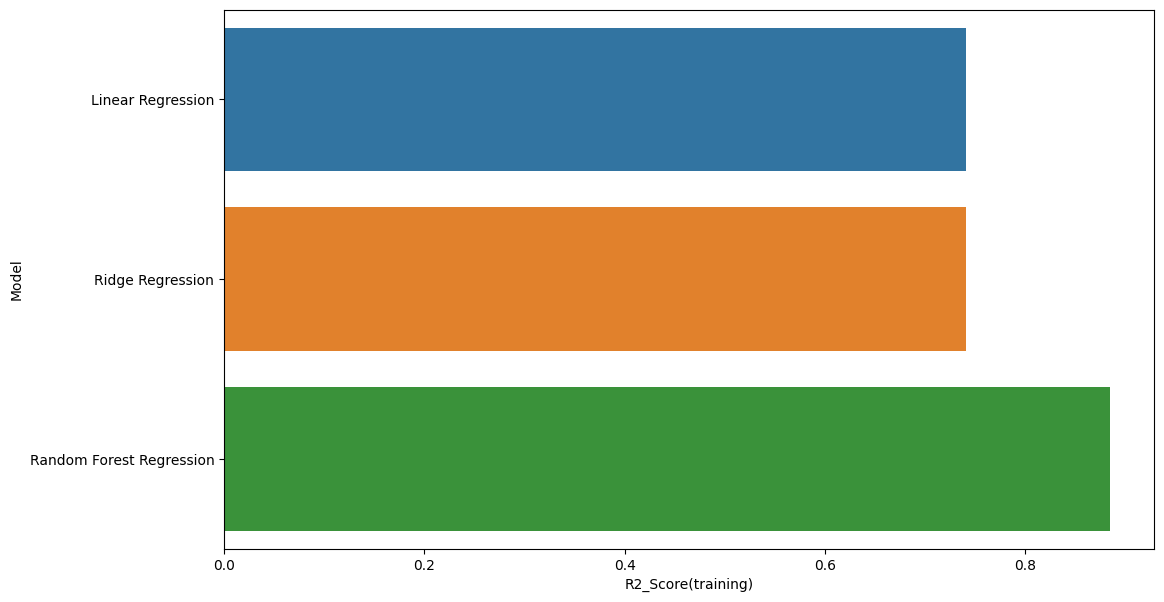

In [57]:
plt.figure(figsize=(12,7))
#comparision.sort_values(by=['RMSE'], ascending=False, inplace=True)
sns.barplot(x='R2_Score(training)', y='Model',data = comparision)
plt.xlabel('R2_Score(training)')
plt.ylabel('Model')
plt.show()

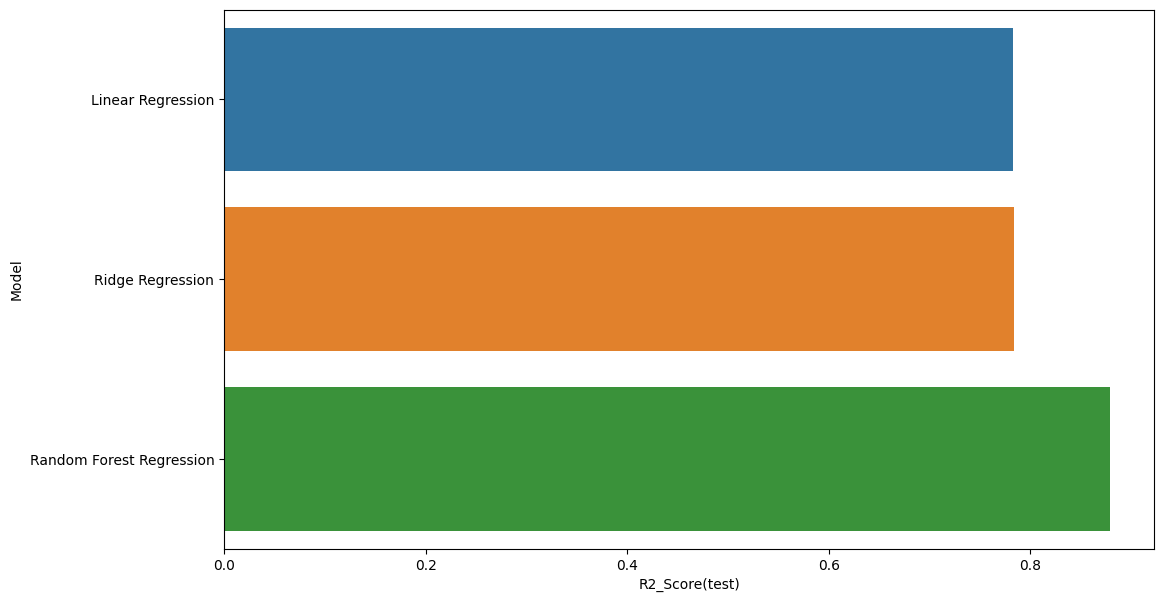

In [58]:
plt.figure(figsize=(12,7))
#comparision.sort_values(by=['RMSE'], ascending=False, inplace=True)
sns.barplot(x='R2_Score(test)', y='Model',data = comparision)
plt.xlabel('R2_Score(test)')
plt.ylabel('Model')
plt.show()